### Are the data usable for classification model

In [1]:
!pip install pandas

In [7]:
import pandas as pd

In [9]:
crf_df = pd.read_csv('../../../scratch/bds/OSIC/Merge_CRF_fill.csv')
dicom_df = pd.read_csv('../../../scratch/bds/OSIC/DICOM_file_all.csv')
# Total number of rows (patients, including duplicates if any)
total_patients = crf_df["Subject ID"].shape[0]

# Number of unique patients
unique_patients = crf_df["Subject ID"].nunique()

print("Total patients (rows):", total_patients)
print("Unique patients:", unique_patients)

Total patients (rows): 13231
Unique patients: 3450


/tmp/ipykernel_2631866/2935080741.py:1: DtypeWarning: Columns (99) have mixed types. Specify dtype option on import or set low_memory=False.
  crf_df = pd.read_csv('../../../scratch/bds/OSIC/Merge_CRF_fill.csv')


In [10]:
crf_df[crf_df['Subject ID']==100293 ][['Subject ID', 'FVC DATE', 'FVC Volume L']]
crf_df

,Subject ID,Study Date,Research : Study Visit Number,Research : Study Time,Research : Height,Research : Weight,Age,Sex,Ethnicity,Race,...,Dyspnea,Cough,Velcro Crackles,Finger Clubbing,Approx. Symptoms start,Week of Approx. Symptoms start,Exacerbation,Approx. Exacerbation date,Week of Approx. Exacerbation date,Change Log
0,897555,1950-10-30,NaN,00:00,0.0,0.0,51.0,Male,No Information,No Information,...,True,'False',True,False,'1951-12-03',57.0,NaN,NaN,NaN,NaN
1,897555,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,True,'True',False,False,'1950-12-04',5.0,NaN,NaN,NaN,NaN
2,897414,3878-04-22,NaN,00:00,0.0,0.0,62.0,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,897414,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,897414,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,321780,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13227,321780,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13228,321780,NaN,NaN,NaN,0.0,NaN,NaN,Male,No Information,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13229,1001394,1964-12-01,NaN,12:00,170.2,54.5,65.0,Male,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
crf_df = crf_df[crf_df['FVC Volume L'].notna()]
total_patients = crf_df["Subject ID"].shape[0]

# Number of unique patients
unique_patients = crf_df["Subject ID"].nunique()

print("Total patients (rows):", total_patients)
print("Unique patients:", unique_patients)



Total patients (rows): 12594
Unique patients: 3275


In [13]:
crf_df.sort_values(by=['Subject ID'])[['Subject ID', 'FVC DATE', 'FVC Volume L']]
#delete duplicates
crf_df = crf_df.drop_duplicates(subset=['Subject ID', 'FVC DATE'])
crf_df
# Number of unique patients
unique_patients = crf_df["Subject ID"].nunique()

print("Total patients (rows):", total_patients)
print("Unique patients:", unique_patients)

Total patients (rows): 12594
Unique patients: 3275


In [14]:
crf_FVC_pred = crf_df.sort_values(by=['Subject ID'])[['Subject ID', 'FVC DATE', 'FVC Volume L', 'Primary Diagnosis', 'Sex', 'FVC Predicted %']]
crf_FVC_pred

,Subject ID,FVC DATE,FVC Volume L,Primary Diagnosis,Sex,FVC Predicted %
10419,100293,'1971-10-04',2.11,CHP,Male,69.4
10420,100293,'1972-11-27',2.14,CHP,Male,71.6
11469,100922,'1976-09-27',1.49,CTD-ILD,Female,78.0
11470,100922,'1977-10-03',1.73,CTD-ILD,Female,92.0
12055,100992,'1970-10-26',2.08,UILD,Female,94.0
...,...,...,...,...,...,...
7774,1007123,'1973-11-01',4.17,CTD-ILD,Male,99.0
7776,1007123,'1974-11-01',3.84,CTD-ILD,Male,92.0
7775,1007123,'1974-05-01',4.09,CTD-ILD,Male,98.0
7772,1007123,'1972-12-01',4.17,CTD-ILD,Male,97.0


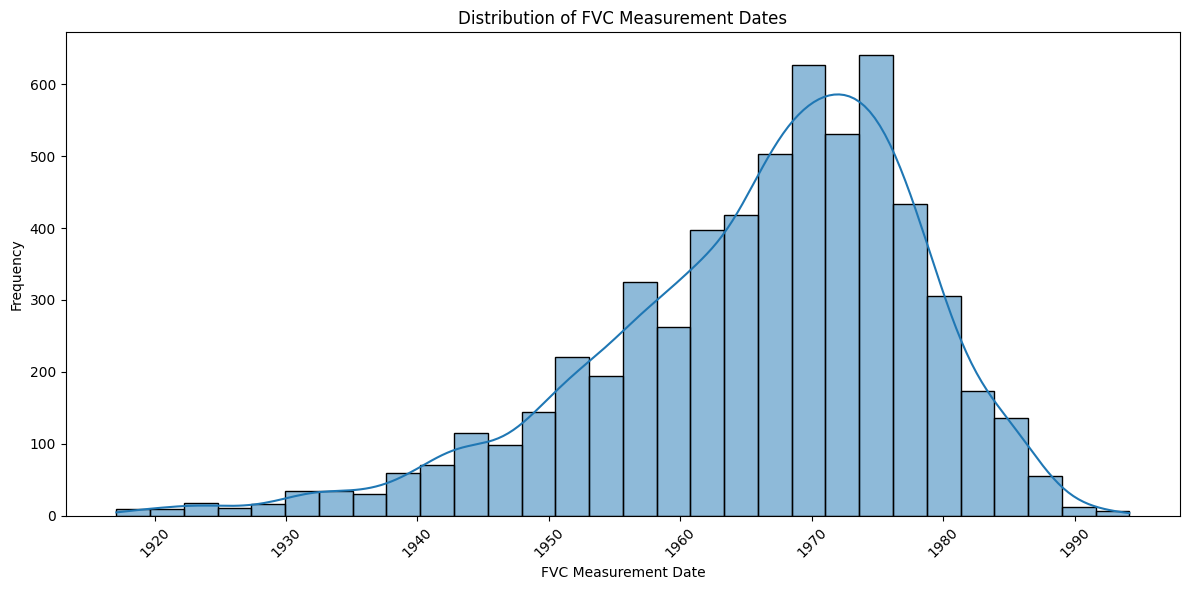

In [15]:
# Plot of Date distribution of FVC measurements
import matplotlib.pyplot as plt
import seaborn as sns
# convert 'FVC DATE' to datetime if not already
crf_FVC_pred['FVC DATE'] = pd.to_datetime(crf_FVC_pred['FVC DATE'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(crf_FVC_pred['FVC DATE'], bins=30, kde=True)
plt.title('Distribution of FVC Measurement Dates')
plt.xlabel('FVC Measurement Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# create column with week of FVC measurement per patient since first FVC measurement
crf_FVC_pred['FVC Week'] = (crf_FVC_pred['FVC DATE'] - crf_FVC_pred.groupby('Subject ID')['FVC DATE'].transform('min')).dt.days // 7
crf_FVC_pred['FVC Week']

10419      0.0
10420     60.0
11469      0.0
11470     53.0
12055     55.0
         ...  
7774     100.0
7776     152.0
7775     126.0
7772      52.0
7773      73.0
Name: FVC Week, Length: 9342, dtype: float64

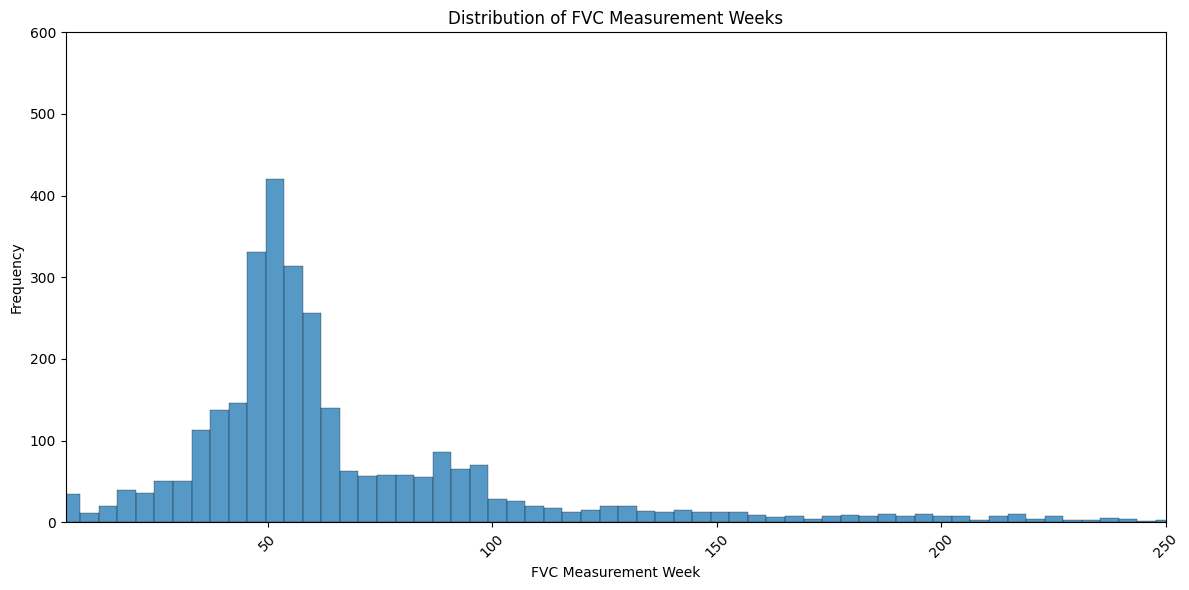

In [10]:
# plot of week of FVC measurement per patient
plt.figure(figsize=(12, 6))
sns.histplot(crf_FVC_pred['FVC Week'], bins=300)
plt.title('Distribution of FVC Measurement Weeks')
plt.xlabel('FVC Measurement Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.xlim(5, 250) 
plt.ylim(0, 600) 
plt.tight_layout()
plt.show()

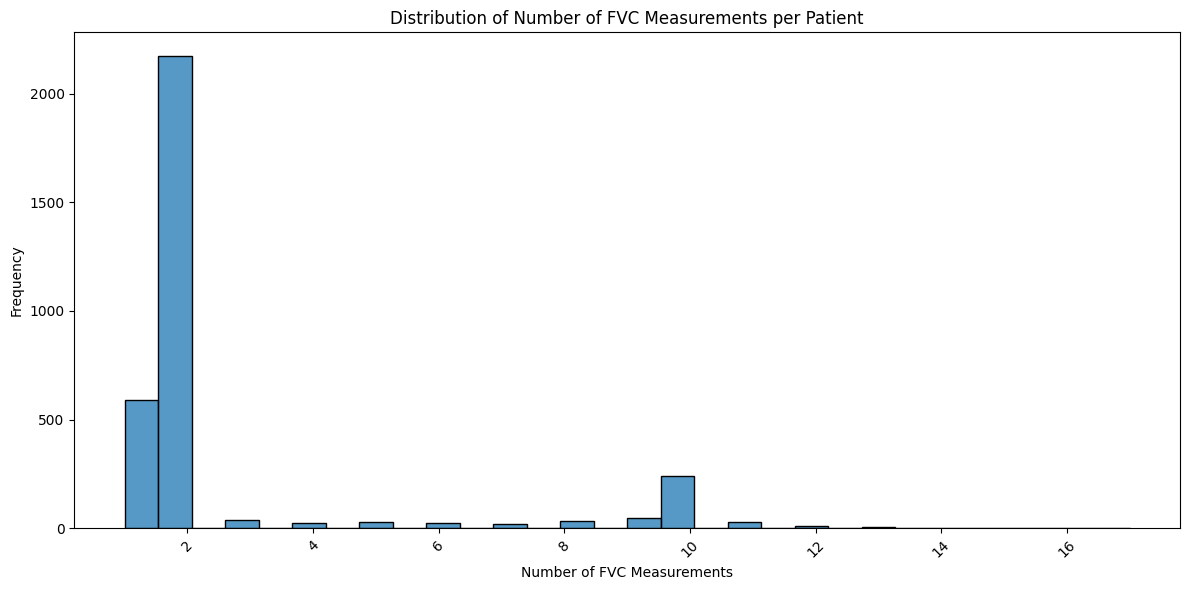

In [11]:
crf_FVC_pred['Subject ID'].value_counts()
# histogram of number of FVC measurements per patient
plt.figure(figsize=(12, 6))
sns.histplot(crf_FVC_pred['Subject ID'].value_counts(), bins=30)
plt.title('Distribution of Number of FVC Measurements per Patient')
plt.xlabel('Number of FVC Measurements')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

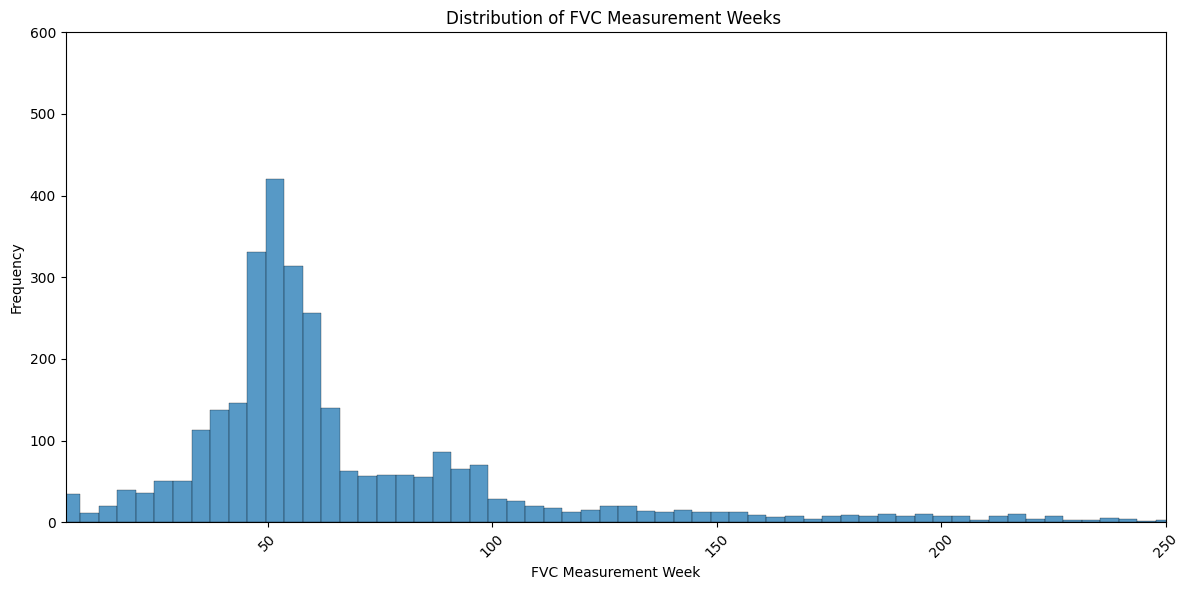

In [12]:
# plot of week from patient with 2 FVC measurements 
patient_followup = crf_FVC_pred[crf_FVC_pred['Subject ID'].map(crf_FVC_pred['Subject ID'].value_counts()) >= 1]
plt.figure(figsize=(12, 6))
sns.histplot(patient_followup['FVC Week'], bins=300)
plt.title('Distribution of FVC Measurement Weeks ')
plt.xlabel('FVC Measurement Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.xlim(5, 250)
plt.ylim(0, 600)
plt.tight_layout()
plt.show()

In [20]:
# create follow-up dataframe with only patients with at least 2 FVC measurements
followup_patients = crf_FVC_pred[crf_FVC_pred['Subject ID'].map(crf_FVC_pred['Subject ID'].value_counts()) >= 2]
followup_patients = followup_patients.sort_values(by=['Subject ID'])
followup_patients['FVC DATE'] = pd.to_datetime(followup_patients['FVC DATE'], errors='coerce')
followup_patients['FVC DATE'] 



10419   1971-10-04
10420   1972-11-27
11469   1976-09-27
11470   1977-10-03
12055   1970-10-26
           ...    
7776    1974-11-01
7770    1972-05-01
7777    1975-02-01
7774    1973-11-01
7771    1972-09-01
Name: FVC DATE, Length: 8751, dtype: datetime64[ns]

In [14]:
len(set(followup_patients['Subject ID']))

2684

In [21]:
dicom_df = pd.read_csv('../../../scratch/bds/OSIC/DICOM_file_all.csv')

In [22]:
dicom_df['Acquisition Date']= dicom_df['Acquisition Date'].dropna().astype(int).astype(str)
dicom_df

,Path,Patient Name,Patient ID,Study UID,SeriesInstanceUID,Acquisition Date,Acquisition Time,Manufacturer,Model,Institution Name,...,Filter Type,Patient Position,Contrast,Number of Images/Files,Number of Unreadable Files,Unreadable files,Station Name,Single Collimation Width,Total Collimation Width,source_path
0,./1.2.840.113704.1.111.1636.1412937710.12/,587713.0,587713,1.2.250.1.38.2.1.14.1.33224.8471191,1.2.840.113704.1.111.1636.1412937710.12,19820607,NaN,Philips,NaN,NaN,...,YA,FFS,NaN,611,0,NaN,NaN,NaN,NaN,../../../scratch/bds/OSIC/587713/dde15463-ece9...
1,./1.2.840.113704.1.111.5228.1390322769.12/,587713.0,587713,1.2.250.1.38.2.1.12.783845947215.2014012117323...,1.2.840.113704.1.111.5228.1390322769.12,19810921,NaN,Philips,NaN,NaN,...,YA,FFS,NaN,559,0,NaN,NaN,NaN,NaN,../../../scratch/bds/OSIC/587713/173dbc2b-36ea...
2,./1.2.826.0.1.3680043.10.1218.1287326539014484...,1007085.0,1007085,1.2.826.0.1.3680043.10.1218.776358270296102956...,1.2.826.0.1.3680043.10.1218.128732653901448474...,19511101,140756.018,SIEMENS,SOMATOM Definition AS+,NaN,...,FLAT,FFS,NaN,312,0,NaN,NaN,0.600,38.4,../../../scratch/bds/OSIC/1007085/ab9b4a45-479...
3,./1.2.826.0.1.3680043.10.1218.9689172886466892...,1007085.0,1007085,1.2.826.0.1.3680043.10.1218.910779456192421320...,1.2.826.0.1.3680043.10.1218.968917288646689212...,19510101,120413.654,SIEMENS,SOMATOM Definition,NaN,...,FLAT,FFS,NaN,293,0,NaN,NaN,1.200,28.8,../../../scratch/bds/OSIC/1007085/664651b3-e2e...
4,./1.3.46.670589.33.1.63696029596991768100002.5...,715999.0,715999,1.2.250.1.38.2.1.14.1.33224.11231899,1.3.46.670589.33.1.63696029596991768100002.524...,19681007,NaN,Philips,NaN,NaN,...,YB,FFS,NaN,354,0,NaN,NaN,0.625,40.0,../../../scratch/bds/OSIC/715999/fd79f45c-8f6f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,./1.2.826.0.1.3680043.10.1218.2910271669774810...,1003077.0,1003077,1.2.826.0.1.3680043.10.1218.844730106931985456...,1.2.826.0.1.3680043.10.1218.291027166977481019...,19650701,111111.000,SIEMENS,SOMATOM Definition AS,NaN,...,FLAT,FFS,NaN,1,0,NaN,NaN,0.600,3.6,../../../scratch/bds/OSIC/1003077/2f356ac0-fa1...
20863,./1.2.826.0.1.3680043.10.1218.1617977120581195...,1003077.0,1003077,1.2.826.0.1.3680043.10.1218.844730106931985456...,1.2.826.0.1.3680043.10.1218.161797712058119526...,19650701,111111.000,SIEMENS,SOMATOM Definition AS,NaN,...,FLAT,FFP,NaN,1,0,NaN,NaN,0.600,3.6,../../../scratch/bds/OSIC/1003077/2f356ac0-fa1...
20864,./1.2.826.0.1.3680043.10.1218.6472362337740196...,1001271.0,1001271,1.2.826.0.1.3680043.10.1218.203008577821910608...,1.2.826.0.1.3680043.10.1218.647236233774019679...,19740101,103123.750,TOSHIBA,Aquilion Prime SP,NaN,...,LARGE,HFS,NaN,451,0,NaN,NaN,0.500,40.0,../../../scratch/bds/OSIC/1001271/40c4a0d1-038...
20865,./1.2.826.0.1.3680043.10.1218.2453493579433027...,1001271.0,1001271,1.2.826.0.1.3680043.10.1218.203008577821910608...,1.2.826.0.1.3680043.10.1218.245349357943302781...,19740101,103123.750,TOSHIBA,Aquilion Prime SP,NaN,...,LARGE,HFS,NaN,451,0,NaN,NaN,0.500,40.0,../../../scratch/bds/OSIC/1001271/40c4a0d1-038...


In [23]:
dicom_df['Acquisition Date'] = pd.to_datetime(dicom_df['Acquisition Date'], errors='coerce')
dicom_df[['Patient ID','Acquisition Date']].sort_values(by=['Patient ID'])

,Patient ID,Acquisition Date
15088,100293,1972-11-27
15087,100293,1972-11-27
15086,100293,1972-11-27
15085,100293,1971-10-04
15090,100293,1972-11-27
...,...,...
503,1007107,1964-10-01
504,1007107,1965-10-01
17533,1007121,1973-11-01
17532,1007121,1973-01-01


In [24]:
followup_DICOM_patients = dicom_df[dicom_df['Patient ID'].map(dicom_df['Patient ID'].value_counts()) >= 2]
followup_DICOM_patients = followup_DICOM_patients.drop_duplicates(subset=['Patient ID', 'Acquisition Date'])
followup_DICOM_patients = followup_DICOM_patients.sort_values(by=['Acquisition Date'])
followup_DICOM_patients['Acquisition Date'] = pd.to_datetime(followup_DICOM_patients['Acquisition Date'], errors='coerce')
followup_DICOM_patients[['Patient ID','Acquisition Date']].sort_values(by=['Patient ID'])

,Patient ID,Acquisition Date
15086,100293,1972-11-27
15081,100293,1971-10-04
13738,100922,1976-09-27
13739,100922,1977-10-03
19385,100992,1970-10-26
...,...,...
11805,1007090,1959-08-01
504,1007107,1965-10-01
503,1007107,1964-10-01
17532,1007121,1973-01-01


In [25]:
followup_DICOM_patients['FVC Week'] = (followup_DICOM_patients['Acquisition Date'] - followup_DICOM_patients.groupby('Patient ID')['Acquisition Date'].transform('min')).dt.days // 7
followup_DICOM_patients[['Patient ID','Acquisition Date','FVC Week']].sort_values(by=['Patient ID'])

,Patient ID,Acquisition Date,FVC Week
15086,100293,1972-11-27,60.0
15081,100293,1971-10-04,0.0
13738,100922,1976-09-27,0.0
13739,100922,1977-10-03,53.0
19385,100992,1970-10-26,55.0
...,...,...,...
11805,1007090,1959-08-01,69.0
504,1007107,1965-10-01,52.0
503,1007107,1964-10-01,0.0
17532,1007121,1973-01-01,0.0


In [26]:
followup_patients['FVC DATE'] = pd.to_datetime(followup_patients['FVC DATE'], errors='coerce')
followup_patients[['Subject ID','FVC DATE']].sort_values(by=['Subject ID'])

,Subject ID,FVC DATE
10419,100293,1971-10-04
10420,100293,1972-11-27
11469,100922,1976-09-27
11470,100922,1977-10-03
12055,100992,1970-10-26
...,...,...
7770,1007123,1972-05-01
7772,1007123,1972-12-01
7773,1007123,1973-05-01
7776,1007123,1974-11-01


In [27]:
from datetime import datetime
test = datetime.now()

plus_minus = [test + pd.DateOffset(days=day) for day in range(-7, 8)]
plus_minus

[Timestamp('2025-11-24 19:04:31.456889'),
 Timestamp('2025-11-25 19:04:31.456889'),
 Timestamp('2025-11-26 19:04:31.456889'),
 Timestamp('2025-11-27 19:04:31.456889'),
 Timestamp('2025-11-28 19:04:31.456889'),
 Timestamp('2025-11-29 19:04:31.456889'),
 Timestamp('2025-11-30 19:04:31.456889'),
 Timestamp('2025-12-01 19:04:31.456889'),
 Timestamp('2025-12-02 19:04:31.456889'),
 Timestamp('2025-12-03 19:04:31.456889'),
 Timestamp('2025-12-04 19:04:31.456889'),
 Timestamp('2025-12-05 19:04:31.456889'),
 Timestamp('2025-12-06 19:04:31.456889'),
 Timestamp('2025-12-07 19:04:31.456889'),
 Timestamp('2025-12-08 19:04:31.456889')]

In [28]:
patient_common_dates =[]
for patient in set(followup_patients['Subject ID']):
    dicom_patient_data = dicom_df[dicom_df['Patient ID'] == patient]
    list_dicom_dates = dicom_patient_data['Acquisition Date'].tolist()

    # Create list of dicom dates +/- 7 days
    list_dicom_dates_plus_minus = []
    for date in list_dicom_dates:
        list_dicom_dates_plus_minus.extend([date + pd.DateOffset(days=day) for day in range(-14, 15)])
    list_crf_dates = followup_patients[followup_patients['Subject ID'] == patient]['FVC DATE'].tolist()

    # Find common dates
    #TODO: + - one week difference 
    common_dates = set(list_dicom_dates) & set(list_crf_dates)
    common_dates_plus_minus = set(list_dicom_dates_plus_minus) & set(list_crf_dates)


    if len(common_dates_plus_minus) > 0:
        if min(common_dates_plus_minus) < max(list_crf_dates):
            patient_common_dates.append(patient)



In [31]:
list_dicom_dates
list_crf_dates
len(patient_common_dates)


1682

In [33]:
followup_with_dicom_dates = followup_patients[followup_patients['Subject ID'].isin(patient_common_dates)]
followup_with_dicom_dates[followup_with_dicom_dates['Subject ID'] == 884616]

,Subject ID,FVC DATE,FVC Volume L,Primary Diagnosis,Sex,FVC Predicted %,FVC Week
148,884616,1974-09-23,2.40,UILD,Male,84.0,51.0
149,884616,1973-10-01,2.63,UILD,Male,88.0,0.0


In [34]:
# Number of unique patients
unique_patients = followup_with_dicom_dates["Subject ID"].nunique()

print("Total patients (rows):", total_patients)
print("Unique patients:", unique_patients)

Total patients (rows): 12594
Unique patients: 1682


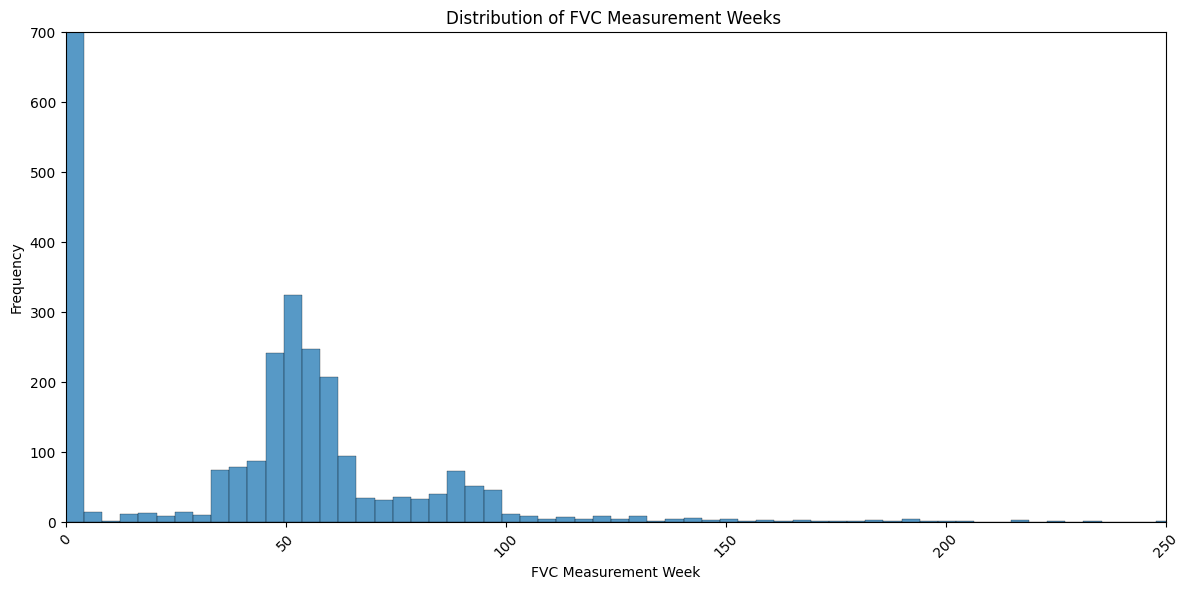

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(followup_with_dicom_dates['FVC Week'], bins=300)
plt.title('Distribution of FVC Measurement Weeks ')
plt.xlabel('FVC Measurement Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.xlim(0, 250)
plt.ylim(0, 700)
plt.tight_layout()
plt.show()

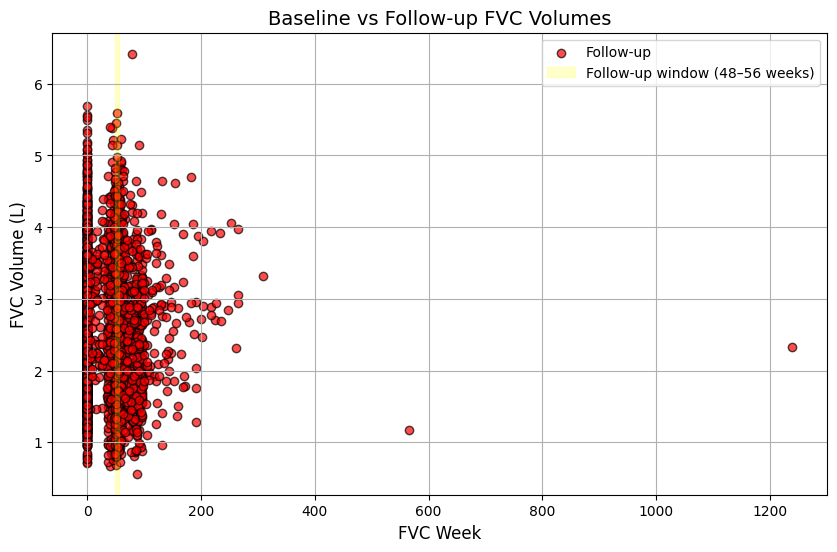

In [30]:
plt.figure(figsize=(10,6))

# Plot followup
plt.scatter(followup_with_dicom_dates["FVC Week"], followup_with_dicom_dates["FVC Volume L"],
            color="red", label="Follow-up", alpha=0.7, edgecolor="black")

# Highlight the full 48–56 week window with shading
plt.axvspan(48, 56, color="yellow", alpha=0.2, label="Follow-up window (48–56 weeks)")

plt.xlabel("FVC Week", fontsize=12)
plt.ylabel("FVC Volume (L)", fontsize=12)
plt.title("Baseline vs Follow-up FVC Volumes", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Patient count with week = 48: 139 Patients
Patient count with week = 49: 37 Patients
Patient count with week = 50: 68 Patients
Patient count with week = 51: 62 Patients
Patient count with week = 52: 124 Patients
Patient count with week = 53: 71 Patients
Patient count with week = 54: 67 Patients
Patient count with week = 55: 50 Patients
Patient count with week = 56: 69 Patients
Total patient count between weeks 45 and 54: 687 Patients


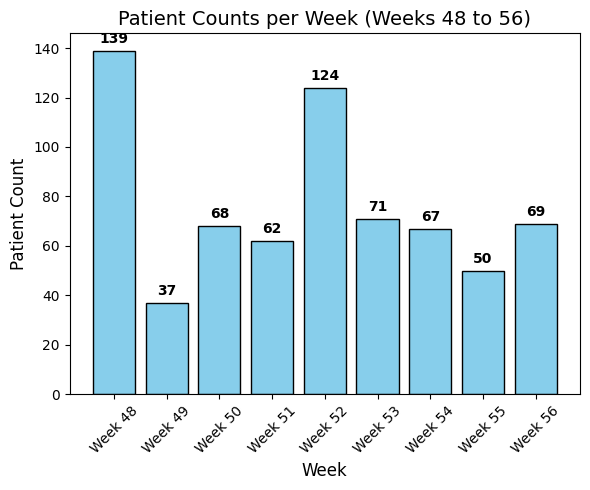

In [27]:
# patient count with week = 49 
patinets_list = []
week_list = []
count_patients = 0
for week in range(48, 57):
    count_patient= followup_with_dicom_dates[followup_with_dicom_dates['FVC Week'] == week].shape[0]
    print(f"Patient count with week = {week}: {count_patient} Patients")
    count_patients += count_patient
    week_list.append(week)
    patinets_list.append(count_patient)
print(f"Total patient count between weeks 45 and 54: {count_patients} Patients")

import matplotlib.pyplot as plt


# Convert week numbers to labels
week_labels = [f"Week {w}" for w in week_list]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(week_labels, patinets_list, color='skyblue', edgecolor='black')

# Add annotations (numbers above bars)
for bar, count in zip(bars, patinets_list):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position (center of bar)
        bar.get_height() + 2,                # y position (slightly above bar)
        str(count),                          # text (the count)
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Titles and labels
plt.title("Patient Counts per Week (Weeks 48 to 56)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Patient Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
followup_patients_48_57 = pd.concat(
    [followup_with_dicom_dates[followup_with_dicom_dates['FVC Week'] == week]
     for week in range(48, 57)],
    ignore_index=True
)

print(followup_patients_48_57.shape)
print(followup_patients_48_57)
# Get unique Subject IDs (optional: drop duplicates)
subject_ids = followup_patients_48_57['Subject ID'].astype(str).unique()

# Join them into a single comma-separated string
subject_ids_str = ",".join(subject_ids)

# Write to text file
with open("/home/pansurya/OSIC_thesis/followup_patients_48_57.txt", "w") as f:
    f.write(subject_ids_str)

print("Saved Subject IDs to followup_patients_48_57.txt")

(687, 7)
     Subject ID   FVC DATE  FVC Volume L    Primary Diagnosis     Sex  \
0        111522 1968-09-09          2.83                  IPF    Male   
1        116111 1961-09-18          3.26                  IPF    Male   
2        122425 1974-09-02          4.41                 UILD    Male   
3        133692 1970-09-07          3.47                  IPF    Male   
4        252351 1974-09-02          2.05                  IPF  Female   
..          ...        ...           ...                  ...     ...   
682     1006459 1967-05-01          2.14        Idiopathic OP    Male   
683     1006495 1953-09-01          2.00  Nonfibrotic HP (HP)  Female   
684     1006762 1975-08-01          3.55                  IPF    Male   
685     1006781 1953-10-01          3.06                  IPF    Male   
686     1007005 1979-07-01          2.23    Fibrotic HP (FHP)  Female   

     FVC Predicted %  FVC Week  
0               86.0      48.0  
1               81.0      48.0  
2              